In [3]:
import subprocess

# Run the pip install command
subprocess.check_call(["pip", "install", "-U", "imbalanced-learn"])

0

In [4]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.8 MB 5.1 MB/s eta 0:00:08
    --------------------------------------- 0.6/38.8 MB 6.2 MB/s eta 0:00:07
   - -------------------------------------- 1.3/38.8 MB 9.4 MB/s eta 0:00:05
   - -------------------------------------- 1.9/38.8 MB 10.0 MB/s eta 0:00:04
   -- ------------------------------------- 2.6/38.8 MB 10.4 MB/s eta 0:00:04
   --- ------------------------------------ 3.3/38.8 MB 11.6 MB/s eta 0:00:04
   ---- ----------------------------------- 3.9/38.8 MB 11.4 MB/s eta 0:00:04
   ---- ----------------------------------- 4.6/38.8 MB 11.7 MB/s eta 0:00:03
   ----- ---------------------------------- 5.1/38.8 MB 11.2 MB/s eta 0:00:04
   ----- 

In [9]:
pip install tensorflow --user


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/cf/24/271e77c22724f370c24c705f394b8035b4d27e4c2c6339f3f45ab9b8258e/tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.18.0 from https://files.pythonhosted.org/packages/76/ad/fa6c508a15ff79cb5409294c293388e0999b7d480f84b65e4287277434fe/tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
import os
import shutil
import pathlib
import PIL
import cv2
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import random
import itertools

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow .keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from PIL import Image, UnidentifiedImageError

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


print("All done")

All done


In [19]:
Path_data = r'C:\Users\Hassan Ahmed Qureshi\Documents\DeepLearningProject\images'
data = os.listdir(Path_data)

Healthy = os.listdir(r'C:\Users\Hassan Ahmed Qureshi\Documents\DeepLearningProject\images\Healthy')
Mild = os.listdir(r'C:\Users\Hassan Ahmed Qureshi\Documents\DeepLearningProject\images\Mild DR')
Moderate = os.listdir(r'C:\Users\Hassan Ahmed Qureshi\Documents\DeepLearningProject\images\Moderate DR')
Proliferate = os.listdir(r'C:\Users\Hassan Ahmed Qureshi\Documents\DeepLearningProject\images\Proliferate DR')
Severe = os.listdir(r'C:\Users\Hassan Ahmed Qureshi\Documents\DeepLearningProject\images\Severe DR')

In [20]:
print("Number of Healty images :", len(Healthy), "\n______________________________\n")
print("Number of Mild images :", len(Mild),  "\n______________________________\n")
print("Number of Moderate images :", len(Moderate),  "\n______________________________\n")
print("Number of Proliferate images :", len(Proliferate),  "\n______________________________\n")
print("Number of severe images :", len(Severe),  "\n______________________________\n")

Number of Healty images : 1000 
______________________________

Number of Mild images : 370 
______________________________

Number of Moderate images : 900 
______________________________

Number of Proliferate images : 290 
______________________________

Number of severe images : 190 
______________________________



In [21]:
import os
import pandas as pd

# Path to the dataset
Path_data = r'C:\Users\Hassan Ahmed Qureshi\Documents\DeepLearningProject\images'
# Create two lists to store paths of images and their labels
imgpaths = []
labels = []

# Convert directory to list
data = os.listdir(Path_data)

# Iterate over the directories (representing classes)
for i in data:
    classpath = os.path.join(Path_data, i)
    
    # Check if the path is a directory (to avoid issues with non-directory files)
    if os.path.isdir(classpath):
        imglist = os.listdir(classpath)  # List all images in the directory
        for img in imglist:
            imgpath = os.path.join(classpath, img)  # Full path to the image
            imgpaths.append(imgpath)
            labels.append(i)  # Label is the folder name (class)

# Convert lists of imgpaths and labels into Pandas Series
Paths = pd.Series(imgpaths, name='Paths')
Labels = pd.Series(labels, name='Labels')

# Concatenate them into a DataFrame
Df = pd.concat([Paths, Labels], axis=1)

# Display the first 5 rows of the DataFrame
Df.head(5)

,Paths,Labels
0,C:\Users\Hassan Ahmed Qureshi\Documents\DeepLe...,Healthy
1,C:\Users\Hassan Ahmed Qureshi\Documents\DeepLe...,Healthy
2,C:\Users\Hassan Ahmed Qureshi\Documents\DeepLe...,Healthy
3,C:\Users\Hassan Ahmed Qureshi\Documents\DeepLe...,Healthy
4,C:\Users\Hassan Ahmed Qureshi\Documents\DeepLe...,Healthy


In [22]:
#train, valid  and test dataframes
train, testval = train_test_split(Df, test_size = 0.2, shuffle = True, random_state = 123)
valid, test = train_test_split(testval, test_size = 0.5, shuffle = True, random_state = 123)

print("Train shape: ", train.shape)
print("Valid shape: ", valid.shape)
print("Test shape: ",test.shape)

train.Labels.value_counts()

Train shape:  (2200, 2)
Valid shape:  (275, 2)
Test shape:  (275, 2)


Labels
Healthy           805
Moderate DR       723
Mild DR           291
Proliferate DR    230
Severe DR         151
Name: count, dtype: int64

In [23]:
batch_size = 20   # As smaller, As more data generated ....In views of data size 
img_size = (224, 224) # standard value (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)


#Create generators

tr_G = ImageDataGenerator(
    zca_whitening=True,
    rotation_range=30.,
    fill_mode='nearest',
    )

V_G = ImageDataGenerator()

t_G = ImageDataGenerator()

#Generate Appropriate Data for fitting into model

Train = tr_G.flow_from_dataframe(train, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)
Valid = V_G.flow_from_dataframe(valid, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)
Test = t_G.flow_from_dataframe(test, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = False, batch_size = batch_size)

Found 2200 validated image filenames belonging to 5 classes.
Found 275 validated image filenames belonging to 5 classes.
Found 275 validated image filenames belonging to 5 classes.


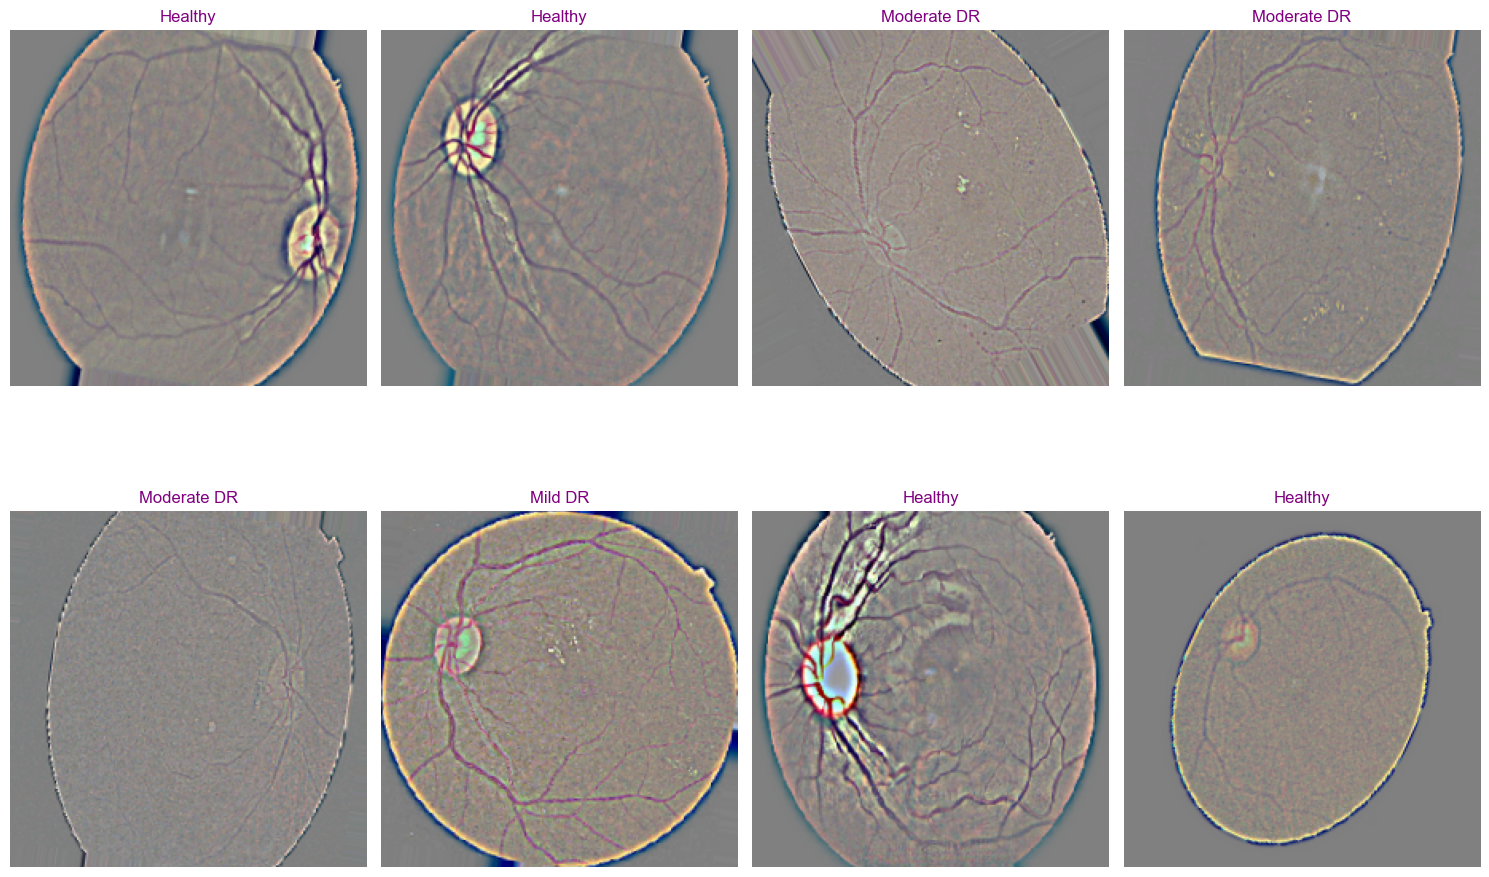

In [30]:
# Define labels and their indices as a dict
L_index = Train.class_indices
L_index

# Store Labels in a list
Keys = list(L_index.keys())
Keys

#Get a sample batch
imgs, labels = next(Train)

# Visualization
plt.figure(figsize= (15, 15))

for i in range(8):
    plt.subplot(3, 4, i +1)
    im = imgs[i]/255
    plt.imshow(im)
    
    #Labelling
    index = np.argmax(labels[i])
    label = Keys[index]
    plt.title(label, color = 'purple')
    plt.axis('off')
    
plt.tight_layout()    
plt.show()

In [34]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Load the pre-trained EfficientNetB3 model
base_model = EfficientNetB3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Build the model
model = Sequential()
model.add(base_model)  # Add the EfficientNetB3 base model
model.add(Dropout(0.3))  # Regularization layer to prevent overfitting
model.add(Flatten())  # Flatten the feature maps
model.add(Dense(512, activation='elu'))  # Fully connected layer
model.add(Dense(256, activation='elu'))  # Fully connected layer
model.add(Dense(128, activation='elu'))  # Fully connected layer
model.add(Dense(5, activation='softmax'))  # Output layer for 5 classes


model.compile(
    Adamax(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['acc']
)
# Print model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)     │ (None, 7, 7, 1536)     │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 1536)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 75264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    38,535,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,484,084 (188.77 MB)

 Trainable params: 38,700,549 (147.63 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [37]:
epochs = 5
history = model.fit(x= Train, epochs= epochs, verbose= 1, validation_data= Valid, validation_steps= None, shuffle= False)

Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - acc: 0.7862 - loss: 0.5656 - val_acc: 0.6945 - val_loss: 0.8358
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - acc: 0.7740 - loss: 0.5734 - val_acc: 0.7273 - val_loss: 0.7252
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - acc: 0.7706 - loss: 0.5616 - val_acc: 0.7127 - val_loss: 0.8437
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - acc: 0.7692 - loss: 0.5689 - val_acc: 0.7018 - val_loss: 0.7989
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - acc: 0.7773 - loss: 0.5421 - val_acc: 0.7236 - val_loss: 0.7158


In [41]:
# accuracy and loss of Train

tr_acc = history.history['acc']
tr_loss = history.history['loss']


# accuracy and loss or Valid\

v_acc = history.history['val_acc']
v_loss = history.history['val_loss']


# highest value of v_acc by getting its index

index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]


# lowest value of v_loss by getting index

index_loss = np.argmin(v_loss)
low_Vloss = v_loss[index_loss]


# n. of epochs based on length of tr_acc values

Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)

    
# Define best epoch

best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'

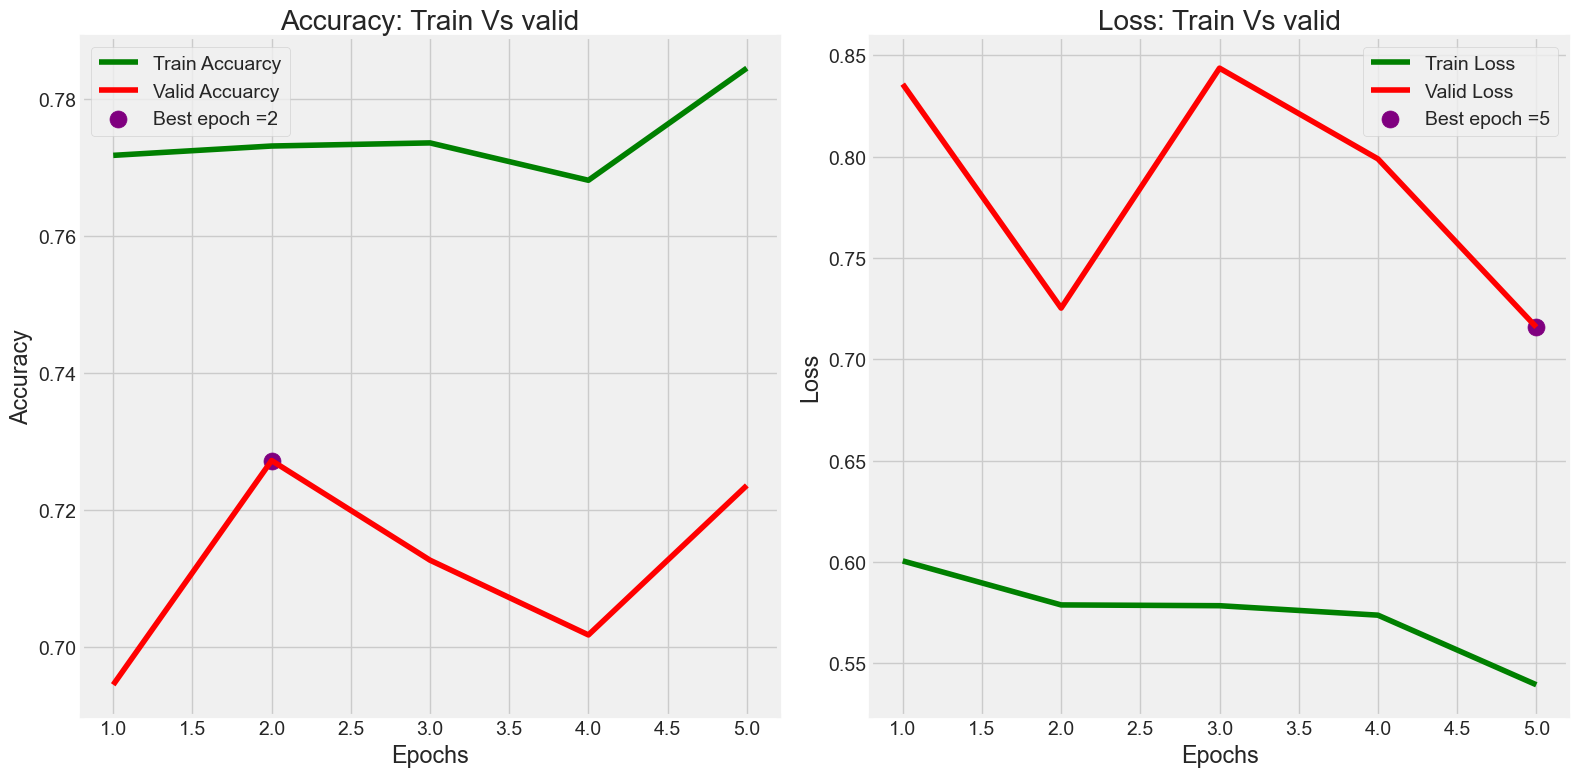

In [42]:
plt.figure(figsize = (16, 8))
plt.style.use('fivethirtyeight')


plt.subplot(1,2,1)
plt.plot(Epochs, tr_acc, "g", label = "Train Accuarcy")
plt.plot(Epochs, v_acc, "r", label = "Valid Accuarcy")
plt.scatter(index_acc+1, high_Vacc, s= 150, color = 'purple', label = best_acc)

plt.title("Accuracy: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(Epochs, tr_loss, "g", label = "Train Loss")
plt.plot(Epochs, v_loss, "r", label = "Valid Loss")
plt.scatter(index_loss+1, low_Vloss, s= 150, color = 'purple', label = best_loss)

plt.title("Loss: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
#let's try 10 epochs now

epochs = 10
history = model.fit(x= Train, epochs= epochs, verbose= 1, validation_data= Valid, validation_steps= None, shuffle= False)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - acc: 0.8008 - loss: 0.5160 - val_acc: 0.6945 - val_loss: 0.8127
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - acc: 0.8023 - loss: 0.4895 - val_acc: 0.6727 - val_loss: 0.8992
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - acc: 0.8144 - loss: 0.5014 - val_acc: 0.7127 - val_loss: 0.7507
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - acc: 0.8300 - loss: 0.4699 - val_acc: 0.7127 - val_loss: 0.8137
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - acc: 0.8228 - loss: 0.4635 - val_acc: 0.7127 - val_loss: 0.7903
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - acc: 0.8016 - loss: 0.5107 - val_acc: 0.6982 - val_loss: 0.9304
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - acc: 0.8116 - loss: 0.4735 - val_acc: 0.7091 - val_loss: 0.7966
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - acc: 0.8254 - loss: 0.4423 - val_acc: 0.7091 - val_loss: 0.8066
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/

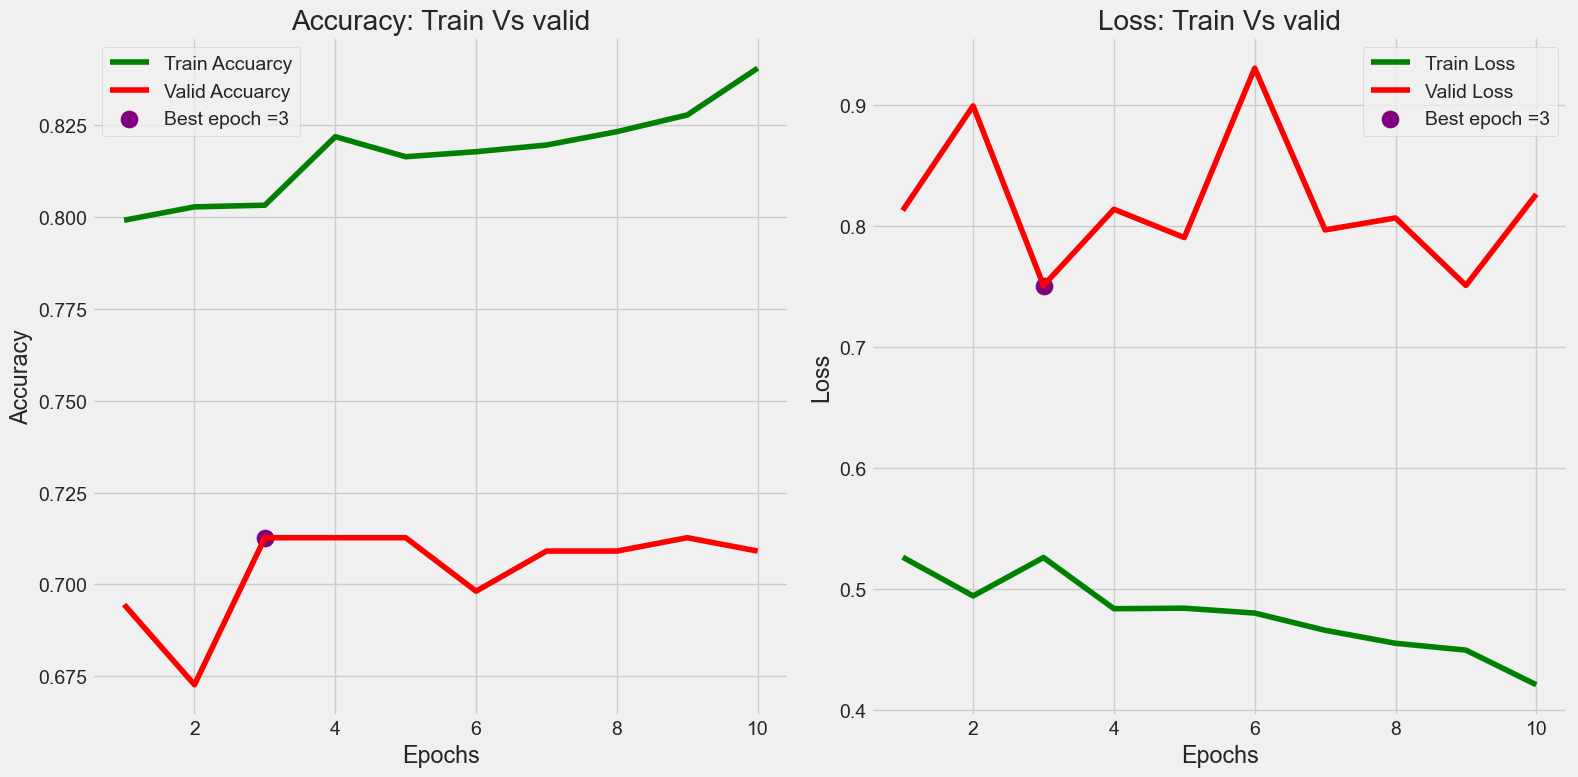

In [44]:
# accuracy and loss of Train

tr_acc = history.history['acc']
tr_loss = history.history['loss']


# accuracy and loss or Valid\

v_acc = history.history['val_acc']
v_loss = history.history['val_loss']


# highest value of v_acc by getting its index

index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]


# lowest value of v_loss by getting index

index_loss = np.argmin(v_loss)
low_Vloss = v_loss[index_loss]


# n. of epochs based on length of tr_acc values

Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)

    
# Define best epoch

best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'

plt.figure(figsize = (16, 8))
plt.style.use('fivethirtyeight')


plt.subplot(1,2,1)
plt.plot(Epochs, tr_acc, "g", label = "Train Accuarcy")
plt.plot(Epochs, v_acc, "r", label = "Valid Accuarcy")
plt.scatter(index_acc+1, high_Vacc, s= 150, color = 'purple', label = best_acc)

plt.title("Accuracy: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(Epochs, tr_loss, "g", label = "Train Loss")
plt.plot(Epochs, v_loss, "r", label = "Valid Loss")
plt.scatter(index_loss+1, low_Vloss, s= 150, color = 'purple', label = best_loss)

plt.title("Loss: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
Train_sc = model.evaluate(Train, verbose = 1)
Valid_sc = model.evaluate(Valid, verbose = 1)
Test_sc =model.evaluate(Test, verbose = 1)

#Print
print('Train Scores : \n    accuracy:', Train_sc[1], '\n      Loss: ', Train_sc[0], '\n________________________')
print('Valid Scores : \n    accuracy:', Valid_sc[1], '\n      Loss: ', Valid_sc[0], '\n________________________')
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Test_sc[0], '\n________________________')

110/110 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - acc: 0.8623 - loss: 0.3635
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - acc: 0.7413 - loss: 0.7541
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - acc: 0.6792 - loss: 0.9978
Train Scores : 
    accuracy: 0.8727272748947144 
      Loss:  0.34308576583862305 
________________________
Valid Scores : 
    accuracy: 0.7090908885002136 
      Loss:  0.8262021541595459 
________________________
Test Scores : 
    accuracy: 0.7200000286102295 
      Loss:  0.8610333204269409 
________________________


In [48]:
predictions = model.predict(Test)
y_pred = np.argmax(predictions, axis=1)

# Check
print(predictions)
print(y_pred)

14/14 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step
[[9.2571920e-01 6.3293748e-02 1.0775925e-02 1.9714612e-04 1.3992219e-05]
 [9.9003708e-01 9.6764760e-03 2.6014837e-04 1.7189730e-05 9.0482854e-06]
 [1.3644700e-01 5.4920757e-01 2.6480073e-01 4.8302382e-02 1.2422670e-03]
 ...
 [9.8287850e-04 7.0381247e-02 4.3726596e-01 3.5621667e-01 1.3515323e-01]
 [9.9999714e-01 2.8564634e-06 2.8814542e-08 2.7754416e-08 2.4115836e-09]
 [1.7849084e-04 1.7070541e-02 9.0379584e-01 7.7061489e-02 1.8937181e-03]]
[0 0 1 1 2 2 2 2 2 2 1 0 0 2 1 4 2 2 2 0 1 0 0 2 2 2 2 1 2 2 2 0 2 2 0 1 2
 2 2 0 2 0 2 0 4 2 0 2 0 2 2 2 2 0 1 1 1 1 2 1 0 2 2 2 2 2 2 1 0 1 0 4 0 0
 2 2 0 2 0 0 2 2 1 2 0 2 0 2 2 3 1 2 2 1 1 2 0 2 1 1 0 2 0 2 0 0 0 0 0 2 2
 1 2 0 1 2 0 0 1 2 0 2 0 1 2 2 2 0 0 2 0 2 2 2 1 2 2 0 1 0 0 0 0 1 0 0 1 0
 0 2 0 0 1 0 2 0 1 2 2 1 1 2 0 1 2 1 0 2 2 0 2 0 2 1 0 2 0 1 3 2 0 0 1 4 1
 0 4 1 2 3 2 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 2 2 2 0 2 0 2 2 0 0 1 0 2 0 2 1
 2 0 2 2 0 2 0 0 2 0 0 0 1 2 2 0 2 2 4 0 1 2 0 4 0 0 0 0 0 2 2 1 1 

In [49]:
# Use n. of keys of  Class indices to greate confusion matrix
Test_cl_ind = Test.class_indices
 
# Get Keys
classes = list(Test_cl_ind.keys())

#CM
cm = confusion_matrix(Test.classes, y_pred)
cm

array([[91,  1,  0,  0,  0],
       [ 4, 25, 10,  0,  2],
       [ 4, 18, 76,  0,  2],
       [ 1,  4, 14,  3,  1],
       [ 1,  2, 13,  0,  3]], dtype=int64)

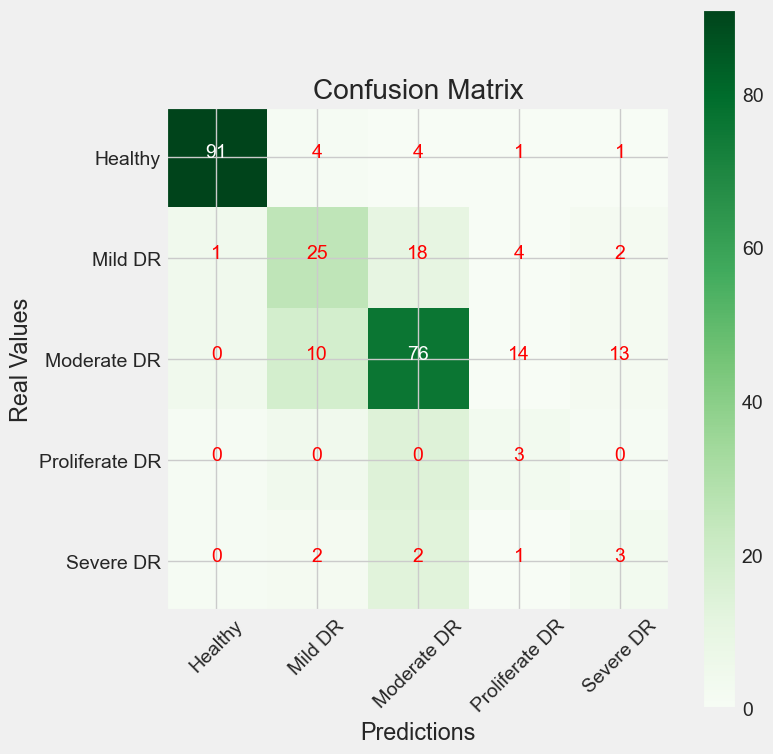

In [50]:
#visualise it
plt.figure(figsize =(8, 8))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh  else 'red')
    
plt.tight_layout()
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()

In [51]:
# Calssification Report
print(classification_report(Test.classes, y_pred, target_names = classes))

                precision    recall  f1-score   support

       Healthy       0.90      0.99      0.94        92
       Mild DR       0.50      0.61      0.55        41
   Moderate DR       0.67      0.76      0.71       100
Proliferate DR       1.00      0.13      0.23        23
     Severe DR       0.38      0.16      0.22        19

      accuracy                           0.72       275
     macro avg       0.69      0.53      0.53       275
  weighted avg       0.73      0.72      0.69       275

